In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm, DivergingNorm
import matplotlib.colors as colors
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
from scipy.optimize import curve_fit
from scipy.interpolate import interp2d, interp1d
from os import path
import colorcet as cc   # install quickly with "conda install colorcet"
from scipy.interpolate import RectBivariateSpline
from matplotlib import ticker
from scipy.ndimage import gaussian_filter
import matplotlib as mpl
from lmfit import Model

In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg' 
font = {
                'family': 'Arial',
                'size': 12,
                'serif': 'Times',
                'sans-serif': 'Arial'
            }

plt.rc('font', **font)

In [3]:
#%matplotlib widget

In [4]:
cd ..

/Users/robertpolski/Documents/NPGroupResearch/Measurements/Triton/qcodes_data


In [5]:
qc.DataSet.default_io.base_location = path.abspath('.')
figfile = path.abspath('.') + '/Figures/W3_W5/'

# PPMS data for W5

## Fan diagrams

In [5]:
w5fan1 = qc.load_data('../../PPMS/qcodes_data/data/2020-01-11/#012_W5_lockin1_14-3_lockin2_4-5_gsweep_1.8K_Fan0Tto9T_10nA_15-33-09')
R1403fan1 = npd.Rxxfromdata(w5fan1, 10e-9, instrument='lockin1')
R0405fan1 = npd.Rxxfromdata(w5fan1, 10e-9, instrument='lockin2')
gw5fan1 = w5fan1.srdc_volt_set[0, :]
bw5fan1 = w5fan1.ppms_field_set_stable_set[:]/1000

In [6]:
Vgatefull = 5.1
V01 = 0.30
nugatefan1 = np.interp(gw5fan1, [V01 - Vgatefull*9/4, V01 + Vgatefull*9/4], [-9, 9])

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(11, 8))
p1 = ax[0].pcolormesh(nugatefan1, bw5fan1, R1403fan1/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(vcenter=1, vmin=0, vmax=2))
plt.colorbar(p1, ax=ax[0])
ax[0].set_title('14-3')
p2 = ax[1].pcolormesh(gw5fan1, bw5fan1, R0405fan1/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(vcenter=1, vmin=0, vmax=2))
plt.colorbar(p2, ax=ax[1])
ax[1].set_title('4-5')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
indx = 220
print(nugatefan1[indx])
plt.figure()
N = 60
plt.plot(bw5fan1[:N], R1403fan1[:N, indx]/1000)

-1.1764705882352944


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Temp-gate plots

In [26]:
dTw5_1 = qc.load_data('../../PPMS/qcodes_data/data/2020-01-12/#002_W5_lockin1_14-3_lockin2_4-5_gsweep_1.8K_10nA_15-00-08')  # different gate points
dTw5_2 = qc.load_data('../../PPMS/qcodes_data/data/2020-01-12/#003_W5_lockin1_14-3_lockin2_4-5_Temp2to20K_15nA_15-09-42')
dTw5_3 = qc.load_data('../../PPMS/qcodes_data/data/2020-01-12/#004_W5_lockin1_14-3_lockin2_4-5_Temp22to118_15nA_19-50-02')
dTw5_4 = qc.load_data('../../PPMS/qcodes_data/data/2020-01-14/#001_W5_lockin1_14-3_lockin2_4-5_Temp120to240_15nA_10-47-06')  # different gate points

Ts_w5 = np.concatenate(([1.8], dTw5_2.ppms_temperature_set_stable_set[:], dTw5_3.ppms_temperature_set_stable_set[:]))
gw5T = dTw5_2.srdc_volt_set[0, :]
Rxx1403T = np.vstack((npd.Rxxfromdata(dTw5_2, 15e-9, instrument='lockin1'), npd.Rxxfromdata(dTw5_3, 15e-9, instrument='lockin1')))
Rxx0405T = np.vstack((npd.Rxxfromdata(dTw5_2, 15e-9, instrument='lockin2'), npd.Rxxfromdata(dTw5_3, 15e-9, instrument='lockin2')))

In [27]:
# assuming the same as the fridge landau fan on 39-38
Vgatefull = 5.1
V01 = 0.25
nugateT = np.interp(gw5T, [V01 - Vgatefull*9/4, V01 + Vgatefull*9/4], [-9, 9])

In [28]:
Rxx1403T.shape

(68, 641)

In [29]:
Ts_w5.shape

(69,)

In [30]:

fig, ax = plt.subplots(2, 1, figsize=(11, 8))
p1 = ax[0].pcolormesh(nugateT, Ts_w5[1:], Rxx1403T/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(vcenter=0.15, vmin=0, vmax=0.5))
p2 = ax[1].pcolormesh(gw5T, Ts_w5[1:], Rxx0405T/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(vcenter=0.15, vmin=0, vmax=0.5))
plt.colorbar(p1, ax=ax[0])
ax[0].set_ylim(2, 40)
ax[0].set_title('14-3')
plt.colorbar(p2, ax=ax[1])
ax[1].set_ylim(2, 40)
ax[1].set_title('4-5')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Triton fridge data for W5

Linecuts for the different electrodes, 40-39, 39-38, 38-37

In [6]:
d3738 = qc.load_data('data/2020-02-03/#001_W5_basetemp_1nA_I41-35_V37-38_865_10-55-48')
d3839 = qc.load_data('data/2020-02-03/#002_W5_basetemp_1nA_I41-35_V39-38_865_11-05-14')
d3940 = qc.load_data('data/2020-02-03/#003_W5_basetemp_1nA_I41-35_V40-39_865_11-14-55')

R3738 = npd.Rxxfromdata(d3738, 1e-9)
R3839 = npd.Rxxfromdata(d3839, 1e-9)
R3940 = npd.Rxxfromdata(d3940, 1e-9)
Vgate3738 = d3738.srframe_volt_p1_set[:]
Vgate3839 = d3839.srframe_volt_p1_set[:]
Vgate3940 = d3940.srframe_volt_p1_set[:]

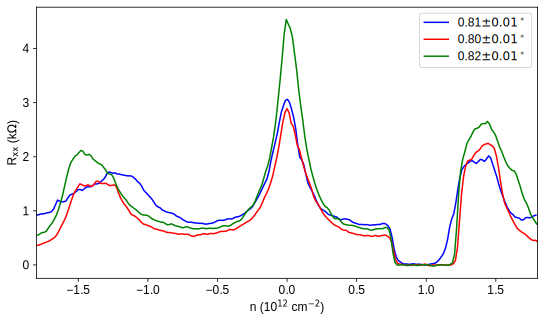

In [10]:
sl = 12.2
C = sl*1.602e-19**2/6.626e-34
V03738 = 0.34
V03839 = 0.05
V03940 = 0.12
n3738 = C/1.602e-19*(Vgate3738-V03738)/10**16
n3839 = C/1.602e-19*(Vgate3839-V03839)/10**16
n3940 = C/1.602e-19*(Vgate3940-V03940)/10**16

plt.figure(figsize=(9, 5))
ng = 0.8
xmin, xmax = -1.8, 1.8
plt.plot(np.ma.masked_outside(n3738, xmin, xmax), gaussian_filter(R3738, ng)/1000, 'b', label='0.81$\pm 0.01^\circ$')
plt.plot(np.ma.masked_outside(n3839, xmin, xmax), gaussian_filter(R3839, ng)/1000, 'r', label='0.80$\pm 0.01^\circ$')
plt.plot(np.ma.masked_outside(n3940, xmin, xmax), gaussian_filter(R3940, ng)/1000, 'g', label='0.82$\pm 0.01^\circ$')
# plt.ylim(-0.0001, 0.005)
plt.xlim(-1.8, 1.8)
# plt.ylim(100, 1e4)
plt.legend()
plt.xlabel('n (10$^{12}$ cm$^{-2}$)')
plt.ylabel('R$_{xx}$ (k$\Omega$)')
# plt.savefig(figfile + 'W5_multipleelectrodesRxx.svg', dpi=300, bbox_inches='tight')

## Landau Fans

In [15]:
dw5fan2 = qc.load_data('data/2020-02-03/#015_W5_865_39-38Rxx_830_38-37Rxx_baseT_2nA_B-Vgsweep_17-50-07')
gw5fan2 = dw5fan2.srframe_volt_p1_set[0, :]
bw5fan2 = dw5fan2.triton_field_set_stable_set[:]
R3938fan2 = npd.Rxxfromdata(dw5fan2, 2e-9, instrument='lockin865')
R3837fan2 = npd.Rxxfromdata(dw5fan2, 2e-9, instrument='lockin830')

In [16]:
dw5fan3 = qc.load_data('data/2020-02-05/#003_W5_865_40-39Rxx_830_40-32Rxy_baseT_2nA_B-Vgsweep_09-38-51')
gw5fan3 = dw5fan3.srframe_volt_p1_set[0, :]
bw5fan3 = dw5fan3.triton_field_set_stable_set[:]
R4039fan3 = npd.Rxxfromdata(dw5fan3, 2e-9, instrument='lockin865')

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(11, 13))
p1 = ax[0].pcolormesh(gw5fan2, bw5fan2, R3938fan2/1000, cmap=cc.cm.linear_kryw_5_100_c64, norm=DivergingNorm(8, 0, 40))
plt.colorbar(p1, ax=ax[0])
ax[0].set_title('39-38')
p2 = ax[1].pcolormesh(gw5fan2, bw5fan2, R3837fan2/1000, cmap=cc.cm.linear_kryw_5_100_c64, norm=DivergingNorm(8, -2, 50))
plt.colorbar(p2, ax=ax[1])
ax[1].set_title('38-37')
p3 = ax[2].pcolormesh(gw5fan3, bw5fan3, R4039fan3/1000, cmap=cc.cm.linear_kryw_5_100_c64, norm=DivergingNorm(8, -2, 50))
plt.colorbar(p3, ax=ax[2])
ax[1].set_title('40-39')
plt.tight_layout()

Bl = 7
Bs = 0
V0 = 0.34
sl = 12.2
b = -V0*sl

for i in [-15, -14, -12, -10, -8, -6, -4, -2, -1, 2, 3, 4, 6, 8, 10, 14]:
    x = np.array([(Bs*i - b)/sl, (Bl*i - b)/sl])
    ax[0].plot(x, (x*sl + b)/i, color='white', lw=0.5)
    
# negative full filling
Vfn = -4.87
bfn = -Vfn*sl

for i in [-9, -7, -5, 2, 4, 6, 8]:
    x = np.array([(Bs*i - bfn)/sl, (Bl*i - bfn)/sl])
    ax[0].plot(x, (x*sl + bfn)/i, color='white', lw=0.5)

# why is this filling different from negative full filling?
Vfp = 5.33
bfp = -Vfp*sl

for i in [-10, -6, -4, -2, 2, 3, 4, 6, 8]:
    x = np.array([(Bs*i - bfp)/sl, (Bl*i - bfp)/sl])
    ax[0].plot(x, (x*sl + bfp)/i, color='white', lw=0.5)
    
Vfph = (5.33-V0)/2 + V0
bfph = -Vfph*sl

for i in [1, 3, 5]:  # should this be on the maxima (even) or minima (odd)? 
    x = np.array([(Bs*i - bfph)/sl, (Bl*i - bfph)/sl])
    ax[0].plot(x, (x*sl + bfph)/i, color='white', lw=0.5)

# maybe... A little greater than 3/4 filling, it seems
Vfp3q = 4.12
bfp3q = -Vfp3q*sl

for i in [-7, -4, -3, -2, -1]:
    x = np.array([(Bs*i - bfp3q)/sl, (Bl*i - bfp3q)/sl])
    ax[0].plot(x, (x*sl + bfp3q)/i, color='white', lw=0.5)
    
ax[0].vlines((-4.9, 5.45), 0, 7, color='white', lw = 0.7)

ax[0].vlines((V0 - Vgatefull, V0, V0 + Vgatefull), 0, 7, color='black', lw=0.9)
    
ax[0].set_xlim(-7, 7)
# ax[0].axis((0.3302532331144912, 6.954736397141387, 0.45718093968676854, 6.944018660446515))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-7, 7)

In [24]:
V0 = 0.34  # 39-38
sl = 12.2
b = -V0*sl
Vfn = -4.87
C = sl*1.602e-19**2/6.626e-34
dBN = 3*8.85e-12/C
print('effective capacitance: {:.4e}'.format(C))
print('effective hBN thickness: {:.1f} nm'.format(dBN*10**9))

Vgatefull = (Vfp - Vfn)/2  # take the average of the positive and negative sides, since they vary slightly
print('Full filling voltage difference: {}'.format(Vgatefull))
nfull = Vgatefull*C/1.602e-19/10**4
print(nfull/10**12) #10**12 cm^-2
a = 0.246e-9

theta = np.sqrt(np.sqrt(3)*nfull*10**4*a**2/8)*180/np.pi
print('theta: ', theta)

effective capacitance: 4.7253e-04
effective hBN thickness: 56.2 nm
Full filling voltage difference: 5.1
1.504322970117718
theta:  0.8043843328776603


In [25]:
Va = (5.4 + 5.04)/2  # 38-37
nf = Va*C/1.602e-19/10**4
# print(nfull/10**12) #10**12 cm^-2
a = 0.246e-9

theta = np.sqrt(np.sqrt(3)*nf*10**4*a**2/8)*180/np.pi
print(theta)

0.8137926566622294


In [26]:
Vb = (5.86 +4.896)/2  # 40-39
nf = Vb*C/1.602e-19/10**4
# print(nfull/10**12) #10**12 cm^-2
a = 0.246e-9

theta = np.sqrt(np.sqrt(3)*nf*10**4*a**2/8)*180/np.pi
print(theta)

0.8260168641725809


In [241]:
(5.45 - 4.9)/2

0.2749999999999999

In [253]:
V0 - -4.9

5.24

In [243]:
5.45 - 0.34

5.11

In [251]:
V0 + Vgatefull

5.4399999999999995

In [247]:
nugatefan2 = np.interp(gw5fan2, [V0 - Vgatefull*6/4, V0, V0 + Vgatefull*6/4], [-6, 0, 6])

In [248]:
fig, ax = plt.subplots(1, 1, figsize=(11, 6))
p1 = ax.pcolormesh(nugatefan2, bw5fan2, R3938fan2/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(8, 0, 40))
plt.colorbar(p1, ax=ax)
plt.tight_layout()

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [218]:
# Log scale
fig, ax = plt.subplots(1, 1, figsize=(11, 6))
p = ax.pcolormesh(nugatefan2, bw5fan2, R3938fan2/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=npd.DivLogNorm(0.55, 0.5, 80))
cb = plt.colorbar(p, ticks=ticker.LogLocator(subs=range(10)), ax=ax, format=ticker.LogFormatterMathtext(), label=r'$\rho$'+'$_{xx}$ (k$\Omega$)')
plt.tight_layout()

/Users/robertpolski/anaconda/envs/qcodes/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …